In [ ]:
!pip install torch
import torch


In [ ]:
!pip -q install transformers

In [ ]:
!pip -q install datasets

In [ ]:
from transformers import AutoTokenizer, AutoModel
from google.colab import widgets

In [ ]:
pretrained = "bert-base-multilingual-uncased" 

In [ ]:
name = pretrained

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(name, use_fast=True)
model = AutoModel.from_pretrained(name)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = ["เริ่ม การ ใช้ งาน BERT ไทย"]

In [ ]:
sent_id = tokenizer.batch_encode_plus(text, padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[101, 1046, 96999, 96997, 1024, 97005, 96999, 100, 1027, 97005, 96993, 40668, 1048, 96992, 96998, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
!pip -q install simpletransformers

     |████████████████████████████████| 215kB 28.6MB/s 
     |████████████████████████████████| 1.8MB 33.8MB/s 
     |████████████████████████████████| 122kB 30.6MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 8.2MB 29.0MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 174kB 54.6MB/s 
     |████████████████████████████████| 133kB 52.9MB/s 
     |████████████████████████████████| 112kB 48.3MB/s 
     |████████████████████████████████| 4.2MB 34.5MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 122kB 18.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
ERROR: datasets 1.6.2 has requirement tqdm<4.50.0,>=4.

In [ ]:
!pip -q install pythainlp

     |████████████████████████████████| 11.0MB 20.9MB/s 
     |████████████████████████████████| 747kB 30.7MB/s 


In [ ]:
from datasets import load_dataset
wongnai_ds = load_dataset('wongnai_reviews')

Using custom data configuration default


Dataset wongnai_reviews downloaded and prepared to /root/.cache/huggingface/datasets/wongnai_reviews/default/1.0.1/33d1dafafb43889fef25801e566f22de04e67c3dd8d08a1ef66f8cb61f6dceb2. Subsequent calls will reuse this data.


In [ ]:
wongnai_ds

DatasetDict({
    train: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 6203
    })
})

In [ ]:
wongnai_ds

DatasetDict({
    train: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 6203
    })
})

In [ ]:
rating = wongnai_ds['train']['star_rating']

output = []
for x in rating:
    if x not in output:
        output.append(x)
print(output)
print(len(output))

[2, 3, 4, 1, 0]
5


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
wongnai_train = pd.DataFrame(wongnai_ds["train"])
wongnai_test = pd.DataFrame(wongnai_ds["test"])


In [ ]:
wongnai_train = wongnai.sample(frac=0.1) 
wongnai_test = wongnai.sample(frac=0.05) 

In [ ]:
from pythainlp.tokenize import word_tokenize

def tokenizer(x):
  y = word_tokenize(x)
  txt = ""
  for i in y:
    txt = txt + " " + i
  return txt[1:]

wongnai_train["tokenized"] = wongnai_train["review_body"].apply(tokenizer)
wongnai_train["labels"] = wongnai_train["star_rating"]
wongnai_train.labels = pd.Categorical(wongnai_train.labels)

In [ ]:
wongnai_train

,review_body,star_rating,tokenized,labels
37208,บุฟเฟต์อาหารนานาชาติราคาไม่ถึง1000บาทมีหลากหลา...,3,บุฟเฟต์ อาหาร นานาชาติ ราคา ไม่ ถึง 1000 บาท ม...,3
11841,Omu\nเป็นร้านอาหารสไตล์คาเฟ่ ที่นำเสนอข้าวห่อไ...,4,Omu \n เป็น ร้านอาหาร สไตล์ คาเฟ่ ที่ นำเสนอ...,4
39197,ร้านนั่งเล่น นั่งชิว กินข้าวสบายๆ\nโดยรวมโอเค\...,2,ร้าน นั่งเล่น นั่ง ชิ ว กินข้าว สบาย ๆ \n ...,2
9732,ร้านอยู่ชั้น G เลยค่ะ โดนัทของที่นี่ ส่วนตัวกิ...,3,ร้าน อยู่ ชั้น G เลย ค่ะ โดนัท ของ ที่นี...,3
19208,ปกติเป็นคนไม่กินลูกชิ้นปลา เพราะชอบมีแต่แป้ง เ...,4,ปกติ เป็น คน ไม่ กิน ลูกชิ้น ปลา เพราะ ชอบ ม...,4
...,...,...,...,...
30899,ร้านนมโอ่ง คาราโอเกะ มีการปรับปรุงร้านใหม่ ใช้...,3,ร้าน นม โอ่ง คาราโอเกะ มี การปรับปรุง ร้าน...,3
15370,690 net/คน ชาบู+ชูชิ(จะแบ่งเป็น2ชุดAกับBวันที่...,2,690 net /คน ชาบู + ชู ชิ ( จะ แบ่ง เป็น 2 ...,2
10178,ตอนแรกกะจะไปกินอีกร้าน พอดีขับรถผ่าน เห็นเป็นร...,1,ตอนแรก กะ จะ ไป กิน อี กร้าน พอดี ขับรถ ผ่าน...,1
8736,ร้านนี้เป็นร้านเล็กๆตรงใกล้เชิงสะพานเพลินตา เก...,3,ร้าน นี้ เป็น ร้าน เล็ก ๆ ตรง ใกล้ เชิง สะพาน ...,3


In [ ]:
wongnai_test.head()

,review_body,star_rating
34297,ปกติแล้วไก่ทอดมักเป็นอาหารช่วงกลางวัน แต่ร้านน...,3
29652,ร้านชีวิต ชีวา คาเฟ่ เป็นร้านที่ขายบิงชูที่อร่...,3
8405,เป็นร้านส้มตำที่นึกถึงเสมอเมื่ออยากกินจิ้มจุ่ม...,2
30360,ร้านของกินเล็กๆในตัวเมืองพัทลุงที่มากความอร่อย...,4
23274,สั่งข้าวขาหมูเนื้อหนังปกติ\n\nรสชาติส่วนเนื้อ ...,2


In [ ]:
wongnai_test["tokenized"] = wongnai_test["review_body"].apply(tokenizer)
wongnai_test["labels"] = wongnai_test["star_rating"]
wongnai_test.labels = pd.Categorical(wongnai_test.labels)

In [ ]:
wongnai_train.sample(n=100)

,review_body,star_rating,tokenized,labels
17333,ร้านแหล่งบรรเทิงยามราตรี บรรยายกาศแบบผับบาร์ น...,3,ร้าน แหล่ งบ รร เทิง ยาม ราตรี บรรยาย กา ศ แ...,3
27699,แหม่ๆ วันนี้มีมาทำหะรูหะราเล็กๆ หลังอิ่ม ลั๊นช...,3,แหม่ ๆ วันนี้ มี มา ทำ หะ รูหะ รา เล็ก ๆ ห...,3
8172,วันจันทร์เย็นที่ผ่านมา มีโอกาสพาคุณพ่อคุณแม่ไป...,3,วัน จันทร์ เย็น ที่ผ่านมา มีโอกาส พา คุณพ่อ ...,3
37826,ร้านบ้านยายเปิดขายมานานประมาณ 10 กว่าปี ร้านเล...,3,ร้าน บ้าน ยาย เปิด ขาย มา นาน ประมาณ 10 กว...,3
38300,วันนี้ผ่านขึ้นทางด่วนมากับพี่ชายและพี่สะใภ้ค่ะ...,2,วันนี้ ผ่าน ขึ้น ทางด่วน มา กับ พี่ชาย และ พี่...,2
...,...,...,...,...
32236,ร้านนี้อยู่ติดกับถนนใหญ่ พหลโยธิน อยู่ใกล้สี่แ...,2,ร้าน นี้ อยู่ ติดกับ ถนนใหญ่ พหลโยธิน อยู่...,2
14456,.•°○☆ ร้านผัดไทป้าลอ ☆○°•.\nเป็นร้านผัดไทเพิงส...,3,.•°○☆ ร้าน ผัด ไท ป้า ลอ ☆○°•. \n เป็น ร้า...,3
39197,ร้านนั่งเล่น นั่งชิว กินข้าวสบายๆ\nโดยรวมโอเค\...,2,ร้าน นั่งเล่น นั่ง ชิ ว กินข้าว สบาย ๆ \n ...,2
36844,ร้านอยู่ติดถนน ใกล้โรงไม้ ขายกระเพาะปลา ปรุงสด...,3,ร้าน อยู่ ติด ถนน ใกล้ โรง ไม้ ขาย กระเพาะ...,3


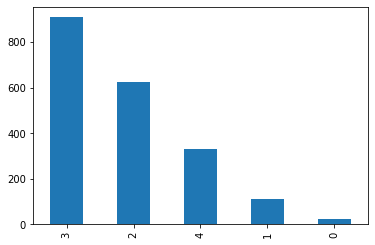

In [ ]:
#import matplotlib as plt 
#wongnai_train["star_rating"].value_counts().plot.bar()
wongnai_test["star_rating"].value_counts().plot.bar()

In [ ]:
# model
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()
model_args.custom_parameter_groups = [
    {
        "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
        "lr": 1e-2,
        'train_batch_size':32,
        "num_train_epochs":3,
    }
]


model = ClassificationModel(
     "bert", 
     name,
     use_cuda=torch.cuda.is_available(), 
     args=model_args, 
     num_labels=len(output),
)
model.train_model(wongnai_train, show_running_loss = True, eval_df=wongnai_eval, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/313 [00:00<?, ?it/s]

(313, 1.6783478023906866)

In [ ]:
model.predict(["ห่วย แตก กิน ไม่ ได้ เลย ขอ บอก อาหาร เน่า มาก กลิ่น เหม็น มี แมลง สาบ มารยาท ทราม สุด ๆ"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([4]),
 array([[-0.09891805, -0.05385616,  0.00109036, -0.08788104,  0.05900647]]))

In [ ]:
model.predict(["ร่้าน นี้ อาหาร เยี่ยม มาก สุดยอด ประทับ ใจ ที่จอดรถ ใหญ่ ตั้งใจ ทำงาน มาก เลย"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([4]),
 array([[-0.09224373, -0.06363454, -0.01206859, -0.08126707,  0.06781841]]))

In [ ]:
model.predict(list(wongnai_train['text'])[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

(array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([[-0.0936413 , -0.05232165,  0.00352144, -0.09126695,  0.05446432],
        [-0.06247881, -0.0836385 , -0.04791299, -0.06767417,  0.08214539],
        [-0.09538944, -0.05140623,  0.00240809, -0.09002667,  0.05532688],
        [-0.09308773, -0.05570311, -0.00393125, -0.08592439,  0.05838939],
        [-0.09515778, -0.05199257,  0.00375424, -0.09058224,  0.0553671 ],
        [-0.09308773, -0.05570311, -0.00393125, -0.08592439,  0.05838939],
        [-0.06897408, -0.07976141, -0.04032597, -0.0706079 ,  0.07946281],
        [-0.0936412 , -0.05232171,  0.00352146, -0.09126699,  0.05446436],
        [-0.07201134, -0.07899995, -0.03814745, -0.07151408,  0.07875156],
        [-0.10038736, -0.04925087,  0.00637304, -0.09033698,  0.05369581]]))

In [ ]:
torch.save(model, 'bertmodel')

In [ ]:
model = torch.load('bertmodel')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.tokenize import word_tokenize

y_train = wongnai_train.review_body
y_test = wongnai_test.review_body

tfidf = TfidfVectorizer()
train_vec = tfidf.fit_transform(wongnai_train.tokenized)
test_vec = tfidf.transform(wongnai_test.tokenized)

MNB = MultinomialNB()

MNB.fit(train_vec,y_train )


array(['"ก๋วยเตี๋ยวต้มยำกากหมู สูตรโบราณ"ร้านอยู่ในซอยรามคำแหง164 เข้าซ.ไปประมาณ100เมตรอยู่ทางขวามือเป็นอาคารพาณิชย์ติดถนนในซอย มาช่วงเที่ยงคนค่อนข้างเยอะมาก เลยต้องลองดู\n\nก๋วยเตี๋ยวของที่นี่เป็นสูตรต้มยำมะนาว ทางร้านใส่มะนาวแท้กลิ่นหอม พริกค่อนข้างเผ็ดน่าจะคั่วเอง น้ำซุปหอมเข้มข้นดี แต่ที่ทีเด็ดเลยคือกากหมู กากหมูที่นี่ทำแปลกขนาดพอดีคำ สีเหลืองน่ากิน พองและกรอบมาก รสชาดดีไม่เคยเห็นกากหมูหน้าตาแบบนี้ คงจะเป็นทีเด็ดของร้านเค้าครับตามชื่อเลย ส่วนพวกหมู ไส้ ตับก็นุ่มใช้ได้ เครื่องเยอะครับ ส่วนเรื่องราคาจานละ35บาทเอง ไม่แพงเลยถ้าเทียบกับปริมาณและรสชาด แนะนำร้านนี้เลยคับให้เลย5ดาว ถูกอร่อยต้องลองคับ\n\nเออเกือบลืมเค้ามีหมูปิ้งนมสดด้วยนะครับ เห็นว่ามีโรงงานทำเอง หมูนุ่มหวานหอมอร่อยดีครับ ข้าวเหนียวก็นึ่งกำลังดีนุ่มไม่แข็งมาก ลองชิมดูครับ',
       'Tuna Ichiban ร้านอาหารญี่ปุ่นอีกร้านที่เรียกได้ว่ามาครบทุกความต้องการของคนรักอาหารญี่ปุ่นเลยครับ เพราะไม่ว่าจะเป็น ปลาดิบ ซูชิ ของทอด รวมถึงอีกหลายๆเมนู ทางร้านก็มีครบครับ รวมถึงมีเมนูพรีเมี่ยมอีกหลายเมนูด้วย เป็นร้านอาหารญี่ปุ่นครบวงจรร้านนึงเลย